# Model creation and accuracy caheck for the Design-2 data
 


In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd . read_csv(("D:\BreakPads_ML\Raw_Input_Data\Design2.csv"))
df = df.drop(columns = ["Unnamed: 0.1","Unnamed: 0"])
df["Youngs_Modulus"]=df["Youngs_Modulus"]*100
df.head() 

,1,2,3,4,11,12,13,14,15,16,...,867,875,876,Design,Pad_Thickness,Pad_Height,Pad_Width,Pis_Radius,Youngs_Modulus,Applied_Pressure
0,3.04864,2.68336,2.86029,3.00007,2.93393,2.63178,2.82516,2.84681,2.79958,2.90235,...,1.20448,3.33304,3.16148,Design_2,7.5,29.3,86.8,15,100,50.0
1,3.77150,3.26368,3.46412,3.63595,3.60047,3.15802,3.37025,3.40128,3.35504,3.54985,...,1.44011,4.07901,3.84376,Design_2,7.5,29.3,86.8,15,100,60.0
2,4.51269,3.85158,4.07448,4.27925,4.27860,3.68262,3.91123,3.95299,3.90983,4.20583,...,1.67492,4.84081,4.53582,Design_2,7.5,29.3,86.8,15,100,70.0
3,5.26856,4.44564,4.69035,4.92882,4.96605,4.20571,4.44881,4.50240,4.46406,4.86829,...,1.90903,5.61589,5.23598,Design_2,7.5,29.3,86.8,15,100,80.0
4,6.03672,5.04505,5.31123,5.58405,5.66142,4.72762,4.98375,5.05014,5.01803,5.53609,...,2.14214,6.40257,5.94325,Design_2,7.5,29.3,86.8,15,100,90.0


## EDA

In [3]:
df.shape

(150, 815)

In [4]:
#check for duplicates
df.duplicated().value_counts()

False    150
dtype: int64

In [5]:
#check for any missing values
for all in df:
    x=all
    if(pd.isnull(df[x]).any()==False):
        continue
    else:
        print(x+' has null')

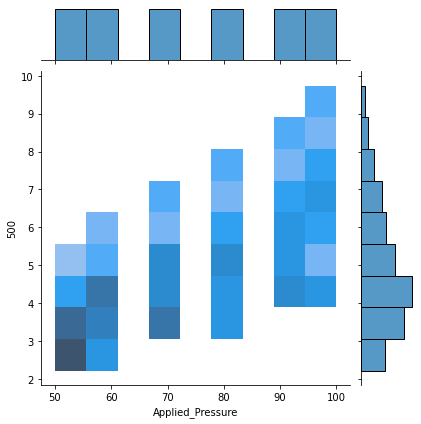

In [14]:
### Bivariant analysis
sns.jointplot(x='Applied_Pressure', y='500', data=df, kind='hist')

<AxesSubplot:xlabel='Applied_Pressure', ylabel='800'>

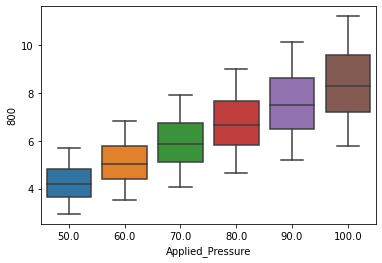

In [6]:
sns.boxplot(x= 'Applied_Pressure',y='800',data=df)

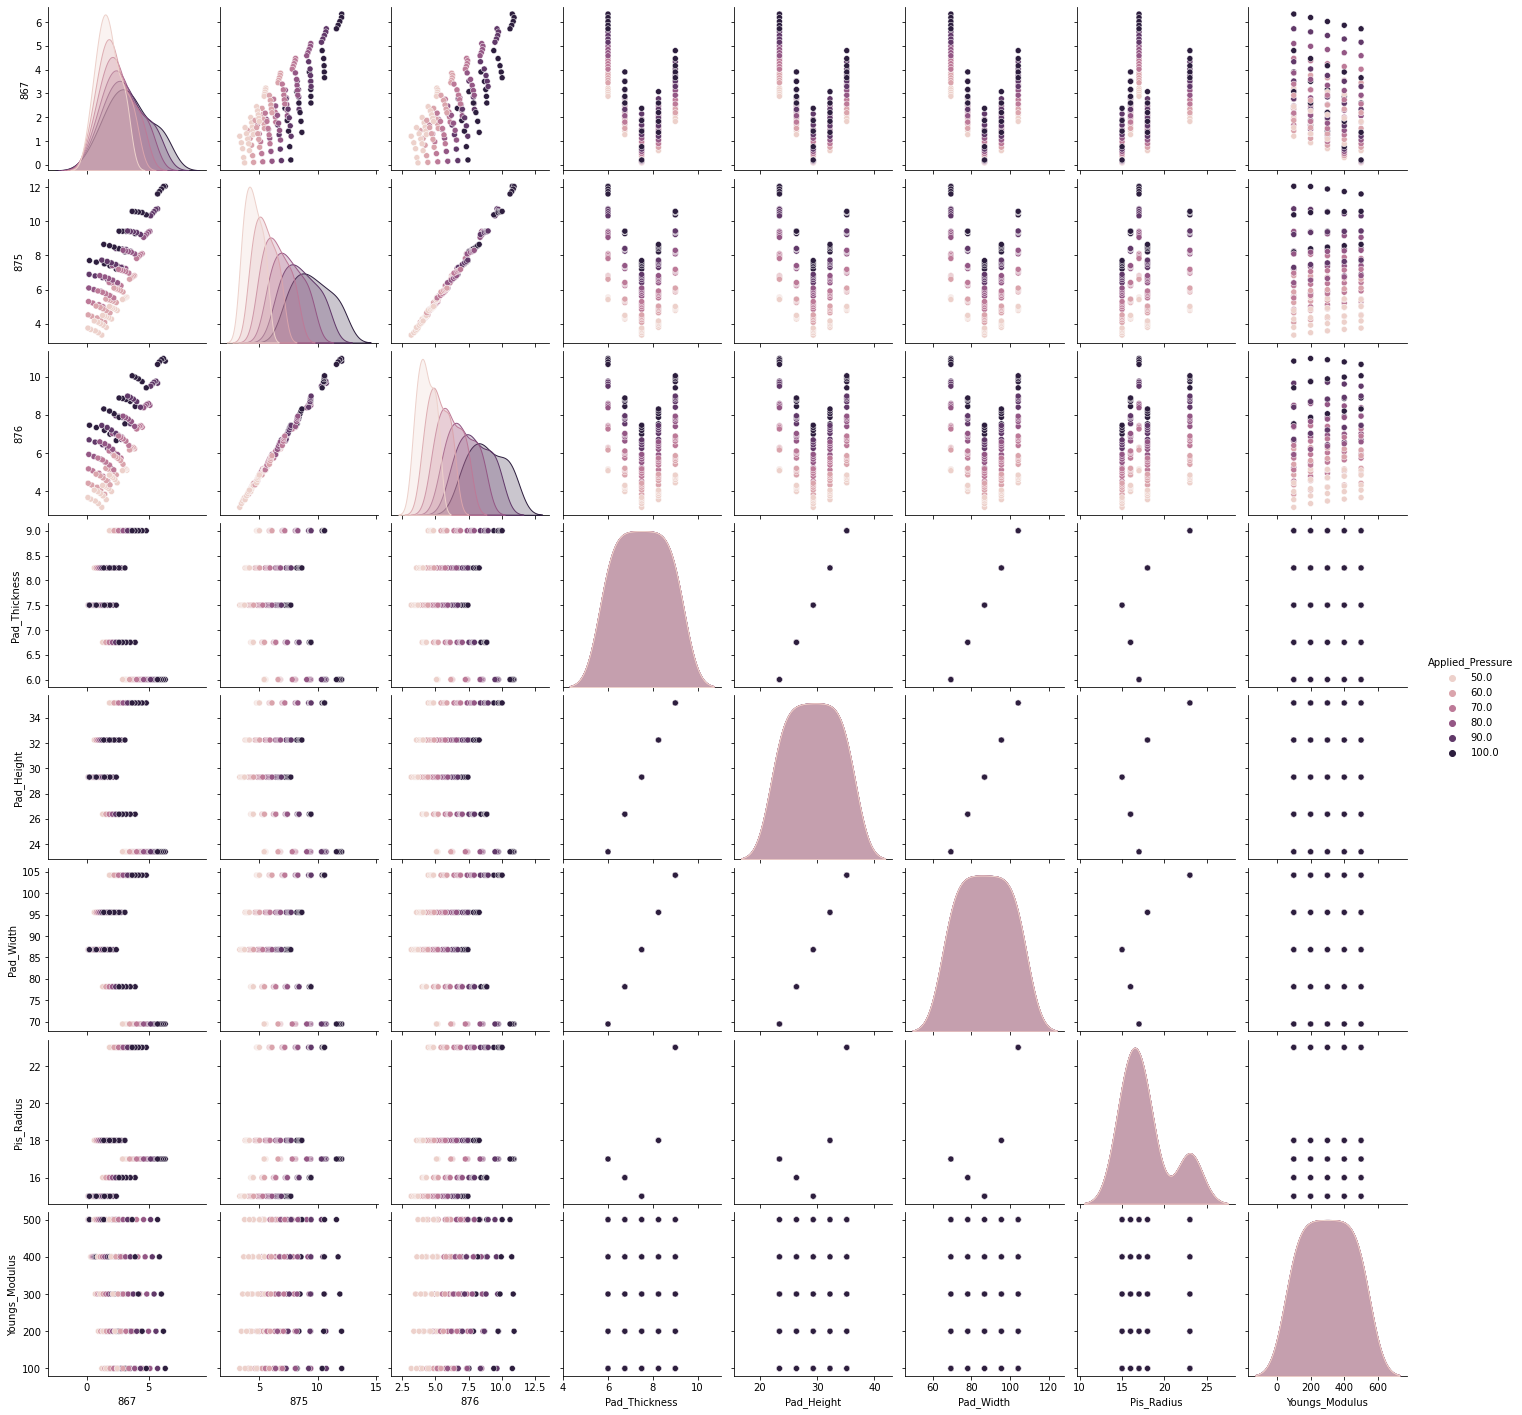

In [7]:
df_2=df
df_2 = df_2.iloc[:,805:]
df_2 = df_2.drop(columns='Design')
sns.pairplot(df_2,hue='Applied_Pressure')

## Feature Selection

In [8]:
x_features = df.iloc[:,809:]
print(x_features.dtypes)
x_features.head(12)

Pad_Thickness       float64
Pad_Height          float64
Pad_Width           float64
Pis_Radius            int64
Youngs_Modulus        int64
Applied_Pressure    float64
dtype: object


,Pad_Thickness,Pad_Height,Pad_Width,Pis_Radius,Youngs_Modulus,Applied_Pressure
0,7.5,29.3,86.8,15,100,50.0
1,7.5,29.3,86.8,15,100,60.0
2,7.5,29.3,86.8,15,100,70.0
3,7.5,29.3,86.8,15,100,80.0
4,7.5,29.3,86.8,15,100,90.0
5,7.5,29.3,86.8,15,100,100.0
6,7.5,29.3,86.8,15,200,50.0
7,7.5,29.3,86.8,15,200,60.0
8,7.5,29.3,86.8,15,200,70.0
9,7.5,29.3,86.8,15,200,80.0


In [9]:
y_targets = df.iloc[:,:808]
print(y_targets.dtypes.value_counts())
y_targets.head(12)

float64    808
dtype: int64


,1,2,3,4,11,12,13,14,15,16,...,860,861,862,863,864,865,866,867,875,876
0,3.04864,2.68336,2.86029,3.00007,2.93393,2.63178,2.82516,2.84681,2.79958,2.90235,...,1.25608,1.22239,0.975036,1.088460,1.180330,1.20955,1.187310,1.204480,3.33304,3.16148
1,3.77150,3.26368,3.46412,3.63595,3.60047,3.15802,3.37025,3.40128,3.35504,3.54985,...,1.49045,1.44148,1.168960,1.303100,1.409330,1.43605,1.418690,1.440110,4.07901,3.84376
2,4.51269,3.85158,4.07448,4.27925,4.27860,3.68262,3.91123,3.95299,3.90983,4.20583,...,1.72233,1.65775,1.362800,1.517280,1.637240,1.66029,1.649200,1.674920,4.84081,4.53582
3,5.26856,4.44564,4.69035,4.92882,4.96605,4.20571,4.44881,4.50240,4.46406,4.86829,...,1.95230,1.87213,1.556480,1.731020,1.864240,1.88277,1.878970,1.909030,5.61589,5.23598
4,6.03672,5.04505,5.31123,5.58405,5.66142,4.72762,4.98375,5.05014,5.01803,5.53609,...,2.18061,2.08483,1.749610,1.943900,2.090060,2.10357,2.107740,2.142140,6.40257,5.94325
5,6.81526,5.64907,5.93662,6.24436,6.36363,5.24864,5.51665,5.59665,5.57199,6.20840,...,2.40766,2.29613,1.942310,2.155990,2.314930,2.32311,2.335710,2.374410,7.19947,6.65682
6,3.07504,2.86629,3.09238,3.23131,3.00152,2.89658,3.16664,3.19103,3.11379,3.02541,...,1.10783,1.10488,0.634375,0.776631,0.917958,1.03581,0.917519,0.927506,3.47255,3.35842
7,3.79382,3.47453,3.73199,3.90184,3.68323,3.48061,3.78278,3.81350,3.72839,3.70124,...,1.31574,1.29674,0.767074,0.936661,1.101180,1.23147,1.101330,1.114300,4.22748,4.06705
8,4.53430,4.09088,4.37751,4.57916,4.37946,4.06359,4.39420,4.43240,4.34161,4.38905,...,1.52069,1.48261,0.901419,1.098010,1.284500,1.42467,1.285330,1.301440,4.99809,4.78543
9,5.29332,4.71434,5.02841,5.26266,5.08777,4.64538,5.00148,5.04824,4.95375,5.08660,...,1.72306,1.66354,1.036990,1.260220,1.467660,1.61563,1.469220,1.488610,5.78274,5.51254


In [10]:
print(x_features.shape,y_targets.shape)

(150, 6) (150, 808)


## Model Building with mutiple target

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn import metrics

In [12]:
x_test, x_train, y_test, y_train = train_test_split(x_features, y_targets, test_size = 0.3, random_state = 100)

### 1. MultiOutPut Regressor with Ridge estimator

In [13]:
MOR_Rd_1 = MultiOutputRegressor(Ridge(random_state=123))
MOR_Rd_1.fit(x_train, y_train)

MultiOutputRegressor(estimator=Ridge(random_state=123))

In [14]:
print('Model_1 train score = ', MOR_Rd_1.score(x_train, y_train))
print('Model_1 test score = ', MOR_Rd_1.score(x_test, y_test))

Model_1 train score =  0.8187380157812061
Model_1 test score =  0.7826583263423172


In [16]:
MOR_Rd_Predts = MOR_Rd_1.predict(x_test)
print('mean squared error for this model is = ', metrics.mean_squared_error(y_test,MOR_Rd_Predts))

mean squared error for this model is =  0.13242227477775748


### 2. Decision Tree Regressor

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
DT_reg_1 = DecisionTreeRegressor(max_depth=2)
DT_reg_2 = DecisionTreeRegressor(max_depth=5)
DT_reg_3 = DecisionTreeRegressor(max_depth=8)
DT_reg_1.fit(x_train, y_train)
DT_reg_2.fit(x_train, y_train)
DT_reg_3.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [19]:
DT_reg_predts_1 = DT_reg_1.predict(x_test)
DT_reg_predts_2 = DT_reg_2.predict(x_test)
DT_reg_predts_3 = DT_reg_3.predict(x_test)

In [20]:
# max depth = 1
print('Train score at max depth 2 = ', DT_reg_1.score(x_train, y_train))
print('Test score at max depth 2 = ', DT_reg_1.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test,DT_reg_predts_1))

Train score at max depth 2 =  0.5542780903465778
Test score at max depth 2 =  0.44307748637678
MeanSquaredError for this model is =  0.78124960530099


In [21]:
# max depth = 2
print('Train score at max depth 5 = ', DT_reg_2.score(x_train, y_train))
print('Test score at max depth 5 = ', DT_reg_2.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test,DT_reg_predts_2))

Train score at max depth 5 =  0.9635965414372226
Test score at max depth 5 =  0.4947839342397337
MeanSquaredError for this model is =  0.4403493432915818


In [22]:
# max depth = 8
print('Train score at max depth 8 = ', DT_reg_3.score(x_train, y_train))
print('Test score at max depth 8 = ', DT_reg_3.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test,DT_reg_predts_3))

Train score at max depth 8 =  0.9999240890513831
Test score at max depth 8 =  0.5240926586429427
MeanSquaredError for this model is =  0.3962660305507205


### 3. Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
MOR_RFR_1 = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=30, random_state=100))
MOR_RFR_1.fit(x_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=30,
                                                     random_state=100))

In [25]:
MOR_RFR_predts = MOR_RFR_1.predict(x_test)

In [26]:
print('Train score for this model = ', MOR_RFR_1.score(x_train, y_train))
print('Test score for this model = ', MOR_RFR_1.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test, MOR_RFR_predts))

Train score for this model =  0.9696590355041766
Test score for this model =  0.8612543794948058
MeanSquaredError for this model is =  0.18401313728960444


#### 3.1 Only Random Forest

In [27]:
RF_1 = RandomForestRegressor(n_estimators=100, max_depth=30, random_state=100)
RF_1.fit(x_train, y_train)

RandomForestRegressor(max_depth=30, random_state=100)

In [28]:
RF_predts = RF_1.predict(x_test)

In [29]:
print('Train score for this model = ', RF_1.score(x_train, y_train))
print('Test score for this model = ', RF_1.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test, RF_predts))

Train score for this model =  0.9588791047693513
Test score for this model =  0.7461417739192863
MeanSquaredError for this model is =  0.1880905603932032


#### 3.2 Regressor Chain with Random Forest 

In [30]:
from sklearn.multioutput import RegressorChain

In [31]:
#Modelwith Regressorchain
RC_RF_1 = RegressorChain(RandomForestRegressor(n_estimators=10, max_depth= 30, random_state=100))
RC_RF_1.fit(x_train, y_train)

RegressorChain(base_estimator=RandomForestRegressor(max_depth=30,
                                                    n_estimators=10,
                                                    random_state=100))

In [32]:
RC_RF_predts = RC_RF_1.predict(x_test)

In [33]:
print('Train score for this model = ', RC_RF_1.score(x_train, y_train))
print('Test score for this model = ', RC_RF_1.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test, RC_RF_predts))

Train score for this model =  0.4792129606889503
Test score for this model =  0.5359206948210575
MeanSquaredError for this model is =  0.5148289371361492


### 4 SVM

In [34]:
from sklearn.svm import LinearSVR

In [35]:
svr = LinearSVR()
SVM_1 = MultiOutputRegressor(svr)
SVM_1.fit(x_train, y_train)

MultiOutputRegressor(estimator=LinearSVR())

In [36]:
SVM_predts = SVM_1.predict(x_test)

In [37]:
print('Train score for this model = ', SVM_1.score(x_train, y_train))
print('Test score for this model = ', SVM_1.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test, SVM_predts))

Train score for this model =  0.33052297018662075
Test score for this model =  0.5249106836610183
MeanSquaredError for this model is =  0.3374785247039092


### 5. XGBoost

In [38]:
import xgboost as xgb
XGB_1 = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror')).fit(x_train,y_train)
XGB_2 = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:linear')).fit(x_train,y_train)

[22:43:45] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:43:45] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:43:46] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:43:46] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:43:46] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:43:46] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:43:46] WARNING: d:\bld\xgboost-split_1645118015404\work\src\

In [39]:
XGB_predts_1 = XGB_1.predict(x_test)
XGB_predts_2 = XGB_2.predict(x_test)

In [40]:
# for SquaredError model
print('Train score for this model = ', XGB_1.score(x_train, y_train))
print('Test score for this model = ', XGB_1.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test, XGB_predts_1))

Train score for this model =  0.9815495253266767
Test score for this model =  0.8976476044456855
MeanSquaredError for this model is =  0.08018333801243059


In [41]:
# for Linear model
print('Train score for this model = ', XGB_2.score(x_train, y_train))
print('Test score for this model = ', XGB_2.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test, XGB_predts_2))

Train score for this model =  0.9815495253266767
Test score for this model =  0.8976476044456855
MeanSquaredError for this model is =  0.08018333801243059


Range of input parameters

| PARAMETER | min | max | Unit |
| --------- | --- | --- | ---- |
| Pad thickness     | 6    | 9    | mm |
| Pad height        | 23.4 | 35.16 | mm |
| Pad width         | 69   | 104 |  mm |
| Piston radius     | 15   | 23  |  mm |
| Youngs_Mo         | 100  | 500 |  GPa |
| Applied _Pressure | 50   | 100 |  bar |

In [42]:
# 'Pad_Thickness', 'Pad_Height', 'Pad_Width', 'Pis_Radius', 'Youngs_Modulus', 'Applied_Pressure'
Example = [[ 8, 33, 100, 22, 450, 90 ]]

In [43]:
results = XGB_1.predict(x_test)
results = pd.DataFrame({'Pressure':results[0]})
results

,Pressure
0,3.100447
1,2.917241
2,3.116107
3,3.404881
4,3.117410
...,...
803,1.124520
804,1.106931
805,1.137398
806,3.432466


In [45]:
# importing the coordinates data 
cordinates2_1 = pd.read_csv(r"D:\Git_Hub\BreakPad_Pressure_distribution_using_ML\Cordinates Datasets\Node_cordinates_Design2_1.csv", header=None )
cordinates2_1.columns = ['Node_Number','X_cord','Y_cord']

In [46]:
cordinates2_2 = pd.read_csv(r"D:\Git_Hub\BreakPad_Pressure_distribution_using_ML\Cordinates Datasets\Node_cordinates_Design2_2.csv", header=None )
cordinates2_2.columns = ['Node_Number','X_cord','Y_cord']

In [47]:
cordinates2_3 = pd.read_csv(r"D:\Git_Hub\BreakPad_Pressure_distribution_using_ML\Cordinates Datasets\Node_cordinates_Design2_4.csv", header=None )
cordinates2_3.columns = ['Node_Number','X_cord','Y_cord']

In [49]:
cordinates2_4 = pd.read_csv(r"D:\Git_Hub\BreakPad_Pressure_distribution_using_ML\Cordinates Datasets\Node_cordinates_Design2_4.csv", header=None )
cordinates2_4.columns = ['Node_Number','X_cord','Y_cord']
cordinates2_4.head()

,Node_Number,X_cord,Y_cord
0,531,-112.175583,54.473242
1,532,-110.346044,53.979442
2,533,-108.516505,53.485642
3,534,-106.686966,52.991842
4,535,-104.857428,52.498041
